In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

This is programming assignment for week 5. In this assignment you will be solving classification task. 

### Grading
The assignment contains both automatically graded and peer reviewed tasks. 

**Automatic grading**\
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and and click button `Validate` to check that everything works as expected. Afterwards, you can submit your work.


**Competition**\
In the second part of the assignment you are asked to train the model with the best score on test dataset. Note, that you are not given correct answers on the test dataset. To get your score, use Kaggle competition, that we've created for you. **The score on the Kaggle liderboard will not affect your grade, instead you need to submit your best result to the separate programming assignment `Predictions on the test set.`** This task is considered passed if your $F_1$ score on the test is larger than 0.7. But we encourage you to try and get larger scores, you can definitely do it:)


**Peer Review**\
Some of the tasks cannot be checked automatically,  therefore, we'll be using peer review. Please, download this notebook with solutions (`File → Download as → Notebook (.ipynb)`) and submit it for peer review. Each peer reviewed task contains grading instructions. 



# Table of Contents:
* [Part1.](#part1) Decision Trees
 - [Task 1](#task1)[1 pt]
 - [Task 2](#task2)[1 pt]
 - [Task 3](#task3)[Peer Review]
* [Part2.](#part2) Competition! [Peer Review]
    

## Part 1. Let's train some decision trees. <a class="anchor" id="part1"></a>

In this part, we will do the simplest preprocessig of the dataset and train decision trees. In the task, you are supposed to predict whether income of a person exceeds \$50K/year. The target variable is equal to `1` if a person earns > \$50k/year and `0` otherwise. 

As an evaluation criterion, we will be using $F_1$score. As you know, it is a weighted average of precision and recall. We are not using accuracy, because the dataset is imbalanced. 

In [2]:
train_data = pd.read_csv('week5_train.csv')
train_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0


In [3]:
from sklearn.model_selection import train_test_split

tr, val = train_test_split(train_data, test_size=0.4, random_state=42)

y_train = tr.target
y_valid = val.target
X_train = tr.drop(['target'], axis=1)
X_valid = val.drop(['target'], axis=1)

all_data = pd.read_csv('week5_train.csv')
y_all = all_data.target
X_all = all_data.drop(['target'], axis=1)

<a class="anchor" id="task1"></a>

---
**Task 1** [1 pt] Create `column_transformer` which has the following steps:
- fills all the missing values 
- encodes all the categorical features using OHE 
- scales numerical features.

P.S. note, that you'll have to import all the required modules yourself.

In [4]:
# your code here
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

all_col=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','age','education_years','capital_gain','capital_loss','hours_per_week']
categ_columns = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
num_columns=['age','education_years','capital_gain','capital_loss','hours_per_week']



# your code here

numeric_pipe  = make_pipeline(
    SimpleImputer(),
    StandardScaler()
)

categ_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)


column_transformer=ColumnTransformer([
    ('numeric',numeric_pipe,num_columns),
 ('categ', categ_pipe, categ_columns)
],
remainder='passthrough'
)


In [5]:
X_transformed = column_transformer.fit_transform(X_train)
X_transformed.shape

X_transformed = column_transformer.fit_transform(X_train)
assert X_transformed.shape[0] == 19536
assert X_transformed.shape[1] == 104

<a class="anchor" id="task2"></a>

---
**Task 2** [1 pt] Create a function `tree_pipe`, which given a maximal tree depth returns a pipeline with two steps:

1. Column transformer (defined above)
2. DecisionTreeClassfier with the required `max_depth` parameter

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

def tree_pipe(max_depth):
    # your code here
    pipeline = make_pipeline(
    column_transformer,
    DecisionTreeClassifier(max_depth=max_depth)
    )
    
    return pipeline

In [7]:
test_pipe = tree_pipe(1)

test_pipe = tree_pipe(12)
tree = test_pipe.steps[1][1]
assert tree.max_depth == 12

<a class="anchor" id="task3"></a>

---
**Task 3** [Peer Reviewed] Fit decision trees of different depth (from 1 to 100) using the function from the **task 2**. For each depth calculate $F_1$score on the train and validation datasets. Draw a plot, how both scores depend on the maximal tree depth

In [8]:
from sklearn.metrics import f1_score
list_score_predict = []
list_score_valid_po_train = []
# your code here
for depth in range(1,101):
    test_pipe = tree_pipe(depth)
    test_pipe.fit(X_train,y_train)
    y_pred= test_pipe.predict(X_valid)
    y_valid_po_train = test_pipe.predict(X_train)
    
    score_predict = f1_score(y_valid, y_pred)
    list_score_predict.append(score_predict)
    score_valid_po_train=f1_score(y_train,y_valid_po_train)
    list_score_valid_po_train.append(score_valid_po_train)
    

 
    
    


In [9]:
pass

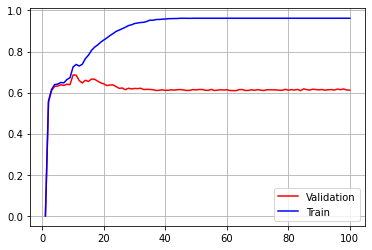

In [10]:
depth = range(1,101)
fig, ax = plt.subplots()
ax.plot(depth, list_score_predict, color = 'r', label = 'Validation')
ax.plot(depth, list_score_valid_po_train, color = 'b', label = 'Train')
ax.grid(True)
ax.legend(loc='upper_right')

plt.show()

**Peer Review Grading.** Please check that the plot above is correct (below you can see the correct answer).

<img src="Correct_f1.png" width=400 height=400 />


---

## Part 2. Let's compete. <a class="anchor" id="part2"></a>

In this second part of the assignment your task will be straightforward: achieve the best possible score on the test set. To make everything fair, we will be using [Kaggle competition](https://www.kaggle.com/c/predict-income-group). 

At this stage you are free to use any models or preprocessing methods you want. You can use assignemnts from the previous weeks as an inspiration!

Below you can see how the test dataset can be loaded.  

In [11]:
test_data = pd.read_csv('week5_test.csv')
test_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


Even though we do not restrict you a lot in this task, we still ask you to stick to the following steps, which will be graded by your peers

**Peer Review Grading.** Below you will find the list of criteria for peer review:
1. Consider categorical features. Show which feature are categorical, check if all the categories are reasonable. Provide plots.
2. Consider numerical features
3. Fill missing values. 
4. Explore different hyperparameters of the decision trees (not only `max_depth`)
5. Choose the best model using cross-validation or just validation
6. Make a prediction on the test set.
7. Try to make your code readable. Do not forget to leave comments.

In [14]:
# YOUR PREPROCESSING AND MODELS HERE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
categ_columns = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
num_columns=['age','education_years','capital_gain','capital_loss','hours_per_week']
numeric_pipe  = make_pipeline(
    SimpleImputer(),
    StandardScaler()
)

categ_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)


column_transformer=ColumnTransformer([
    ('numeric',numeric_pipe,num_columns),
 ('categ', categ_pipe, categ_columns)
],
remainder='passthrough'
)


def tree_pipe(max_depth):
    # your code here
    pipeline = make_pipeline(
        column_transformer,
        DecisionTreeClassifier(max_depth=max_depth,  ccp_alpha=0.0000000002, min_samples_leaf=5, min_impurity_split=0.0000000000000000005,min_samples_split=0.000005, max_leaf_nodes=117)
    )
    
    return pipeline

def forest_pipe():
    # your code here
    pipeline = make_pipeline(
        column_transformer,
        RandomForestClassifier(n_estimators=150, max_depth=10,min_samples_leaf=3)
    )
    
    return pipeline

def grad_pipe():
    # your code here
    pipeline = make_pipeline(
        column_transformer,
        GradientBoostingClassifier(loss='exponential',n_estimators=1000,learning_rate=0.2, criterion='mae')
    )
    
    return pipeline


grad=grad_pipe()
forest = forest_pipe()
test_tree = tree_pipe(10)




In [15]:
#tree_pipe_f1
test_tree.fit(X_train, y_train)
y_pred= test_tree.predict(X_valid)
y_valid_po_train = test_tree.predict(X_train)
    
score_predict_tree = f1_score(y_valid, y_pred)
score_predict_tree

0.6939175931981687

In [16]:
#forest_pipe_f1
forest.fit(X_train, y_train)
y_pred= forest.predict(X_valid)
y_valid_po_train = forest.predict(X_train)
    
score_predict_forest = f1_score(y_valid, y_pred)
score_predict_forest

0.6482732732732733

In [17]:
#grad_pipe_f1
grad.fit(X_train, y_train)
y_pred= grad.predict(X_valid)
y_valid_po_train = grad.predict(X_train)
    
score_predict_grad = f1_score(y_valid, y_pred)
score_predict_grad

KeyboardInterrupt: 

In [18]:
#tried gridsearch for decision tree but did not worked well
from sklearn.model_selection import GridSearchCV

# your code here
param_grid = [
    {
        "decisiontreeclassifier": [DecisionTreeClassifier()],
        'decisiontreeclassifier__ccp_alpha': [0.00000002,0.000000002,0.000000000000000000000002,0.0000000000000000000000000000002,0.005,0.00005,0.000005],
        #"decisiontreeclassifier__min_impurity_split": [0.00000002,0.000000002,0.000000000000000000000002,0.0000000000000000000000000000002, 0.005,0.00005,0.000005],
        #"decisiontreeclassifier__min_samples_split": [0.00000002,0.000000002,0.000000000000000000000002,0.0000000000000000000000000000002, 0.005,0.00005,0.000005],
        #"decisiontreeclassifier__max_features": ['auto', 'sqrt', 'log2','None'],
        #"decisiontreeclassifier__max_leaf_nodes": [1,2,3,4,5,6,7,8]
        
    },

]

grid_pipe = GridSearchCV(tree_pipe(10), param_grid=param_grid, cv=5, scoring='f1')
grid_pipe
grid_pipe.fit(X_train, y_train)
grid_pipe.best_estimator_
grid_pipe.best_score_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                         

In [238]:
preds = grid_pipe.predict(test_data)
# pd.DataFrame({'Prediction': preds}).to_csv('my_prediction.csv')

df = pd.DataFrame({'Prediction': preds})
df.index.name = 'Id'
df['Prediction'] = df['Prediction'].apply(lambda x: bool(x))
display(df)
df.to_csv('my_prediction.csv')

,Prediction
Id,
0,False
1,False
2,False
3,True
4,False
...,...
16276,False
16277,False
16278,True


In [ ]:
# Do not forget to save your predictions on test and submit them on Kaggle

Below you can see, how `csv` file with the prediction can be created and saved. This file can be later used to upload to Kaggle. Please note, that type of the prediction should be `integer`. 

In [ ]:
sample_prediction = np.ones(test_data.shape[0], dtype=int)
pd.DataFrame({'Prediction': sample_prediction}).to_csv('my_prediction.csv')

Do not forget to submit your best prediction to the `Predictions on the test set.` programming assignment!

This file will be saved to 

1. Click the Jupyter logo on the top left corner, which will take you to the file tree view.
2. Go to the `release/week5` folder, the file `'my_prediction.csv'` should already be there. If not, make sure that you've ran the cell above.
3. When you select this file using a tick box, the bottomn `Download` will appear on the top panel. Use it to download the file.